## No Need To Run This Notebook!
This notebook is only there to document what was done during the data preprocessing.
In the absolute exceptional emergency of needing to run it again, please check file paths.
Some may need adding "../" before them.

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [25]:
%run import_data_

Continuing with existing version of data folder
Goodreads dataset loaded successfully as books_goodreads
Pandas dataframes (books_goodreads, books_big, book, users, ratings) loaded successfully
Columns in DataFrames 'users' and 'ratings' renamed
You can use the DataFrames 'books' or 'books_big' - they are exactly the same (big) dataset
loading books_ratings and books_users_ratings
Ready to go!


In [26]:
books[books['isbn'].duplicated() == True] 
# removed duplicate of book (isbn 486404242) in .csv file
# kept the instance of the book with the most complete data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre


In the original EDA, this following plot includes a high ranking author name "Not applicable (NA )"

Text(0.5, 1.0, 'Top 20 Authors')

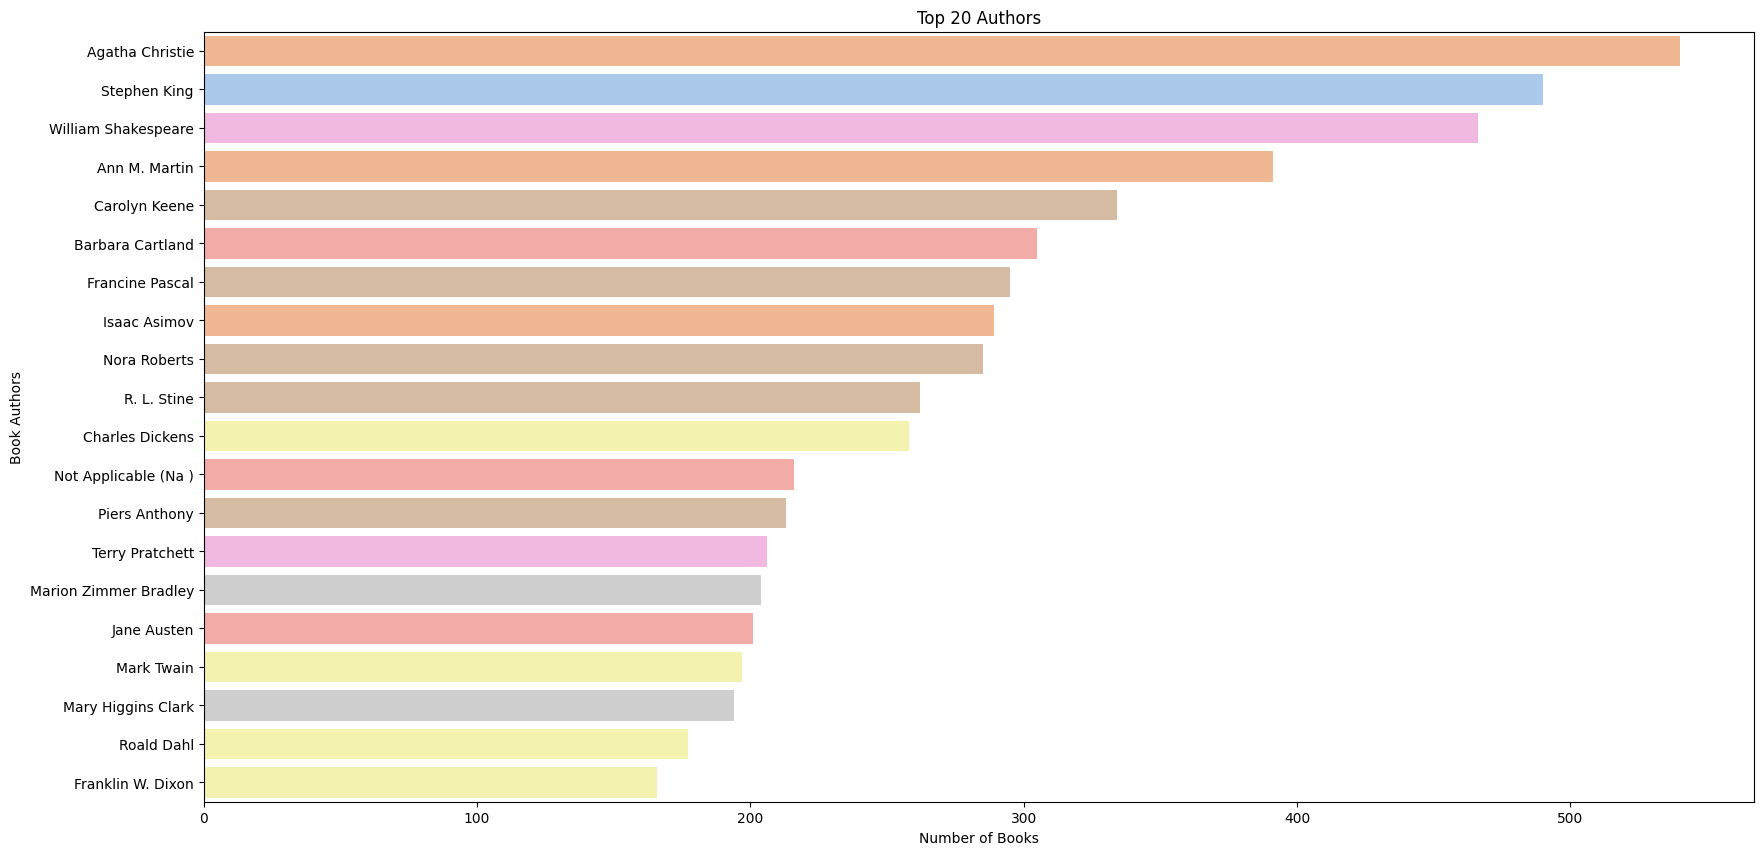

In [6]:
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_author', data=books, order=pd.Series(books['book_author']).value_counts().iloc[:20].index, hue='book_author', legend=False, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Book Authors')
plt.title('Top 20 Authors')

In [7]:
order=pd.Series(books['book_author']).value_counts().iloc[:20]
order.head(20)
"""
book_author
Agatha Christie          540
Stephen King             490
William Shakespeare      466
Ann M. Martin            391
Carolyn Keene            334
Barbara Cartland         305
Francine Pascal          295
Isaac Asimov             289
Nora Roberts             285
R. L. Stine              262
Charles Dickens          258
Not Applicable (Na )     216
Piers Anthony            213
Terry Pratchett          206
Marion Zimmer Bradley    204
Jane Austen              201
Mark Twain               197
Mary Higgins Clark       194
Roald Dahl               177
Franklin W. Dixon        166
Name: count, dtype: int64
"""

'\nbook_author\nAgatha Christie          540\nStephen King             490\nWilliam Shakespeare      466\nAnn M. Martin            391\nCarolyn Keene            334\nBarbara Cartland         305\nFrancine Pascal          295\nIsaac Asimov             289\nNora Roberts             285\nR. L. Stine              262\nCharles Dickens          258\nNot Applicable (Na )     216\nPiers Anthony            213\nTerry Pratchett          206\nMarion Zimmer Bradley    204\nJane Austen              201\nMark Twain               197\nMary Higgins Clark       194\nRoald Dahl               177\nFranklin W. Dixon        166\nName: count, dtype: int64\n'

In [42]:
# There are 216 books with the book_author 'Not Applicable (Na )'
# Let's replace those with NA for now
books['book_author'] = books['book_author'].replace('Not Applicable (Na )', pd.NA)

Text(0.5, 1.0, 'Top 20 Authors')

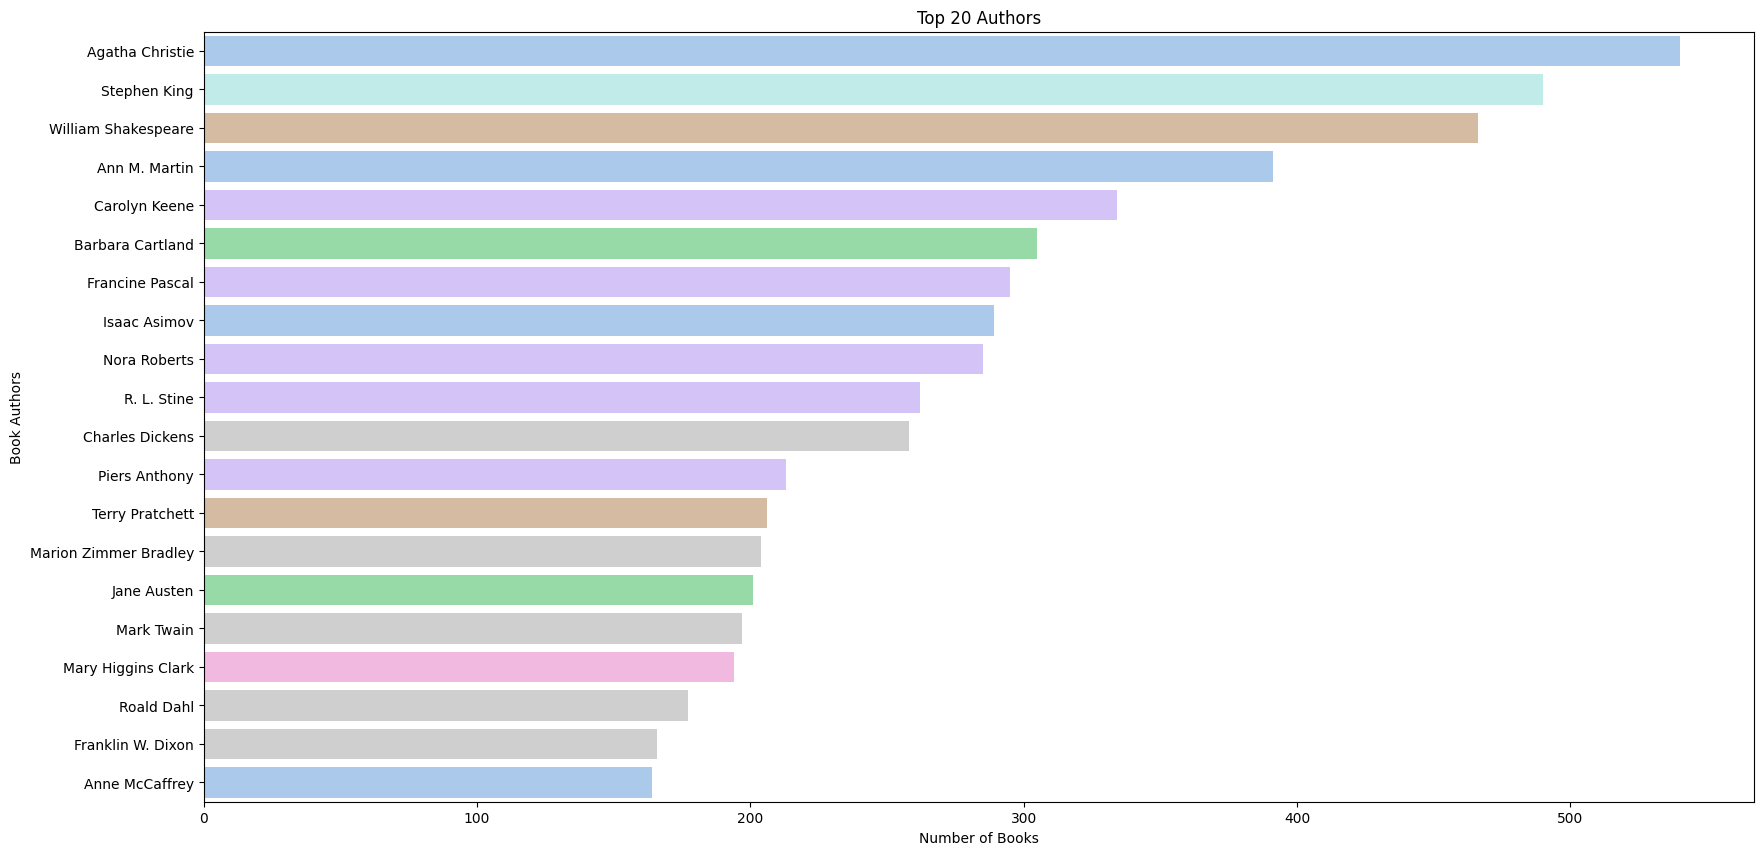

In [9]:
# Let's check the top 20 authors again
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_author', data=books, order=pd.Series(books['book_author']).value_counts().iloc[:20].index, hue='book_author', legend=False, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Book Authors')
plt.title('Top 20 Authors')

In [19]:
##### Scraping the 216 missing values in books.book_author again from Google API
# First, let's define a function that scrapes the book author from Google API, 
# since Open Library API failed us for these 216 authors:

In [43]:
import requests

def get_book_author(isbn):
    # Define the API endpoint
    url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}'
    
    # Make the API request
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Check if any books were found
        if 'items' in data:
            # Extract the author(s) from the first item
            authors = data['items'][0]['volumeInfo'].get('authors', ['No author found'])
            return ', '.join(authors)  # Join the authors list into a single string
        else:
            return 'No author found'
    else:
        return 'Error fetching author'

# Example usage:
print(get_book_author('738702943'))  # Replace with an actual ISBN


No author found


In [44]:
# Apply the function to rows with missing authors
books['book_author'] = books.apply(
    lambda row: get_book_author(row['isbn']) if pd.isna(row['book_author']) else row['book_author'], axis=1
)

In [45]:
# Check if any pd.NA values remain
books.book_author.isna().sum()

0

In [46]:
books.book_author[books['book_author'] == 'No author found'].count()
# Reduced books with no author information from 216 to 102

90

In [47]:
books.book_author[books['book_author'] == 'Error fetching data'].count()

0

In [48]:
books[(books['book_author'] == 'No author found') & (books['genre'] == 'No genre found')]
# At least we know the genre of the books with missing authors
# In case these are still helpful, they will not be removed

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre


In [49]:
books[(books['book_author'] == 'No author found') & (books['genre'] == 'Error fetching data')]


,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre


In [ ]:
# Found book data on Amazon and added it to the .csv file

In [50]:
books[(books['book_author'] == 'Error fetching data') & (books['genre'] == 'Error fetching data')]
# It's good to know that there are no more books with missing authors and genres

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre


Text(0.5, 1.0, 'Top 20 Authors')

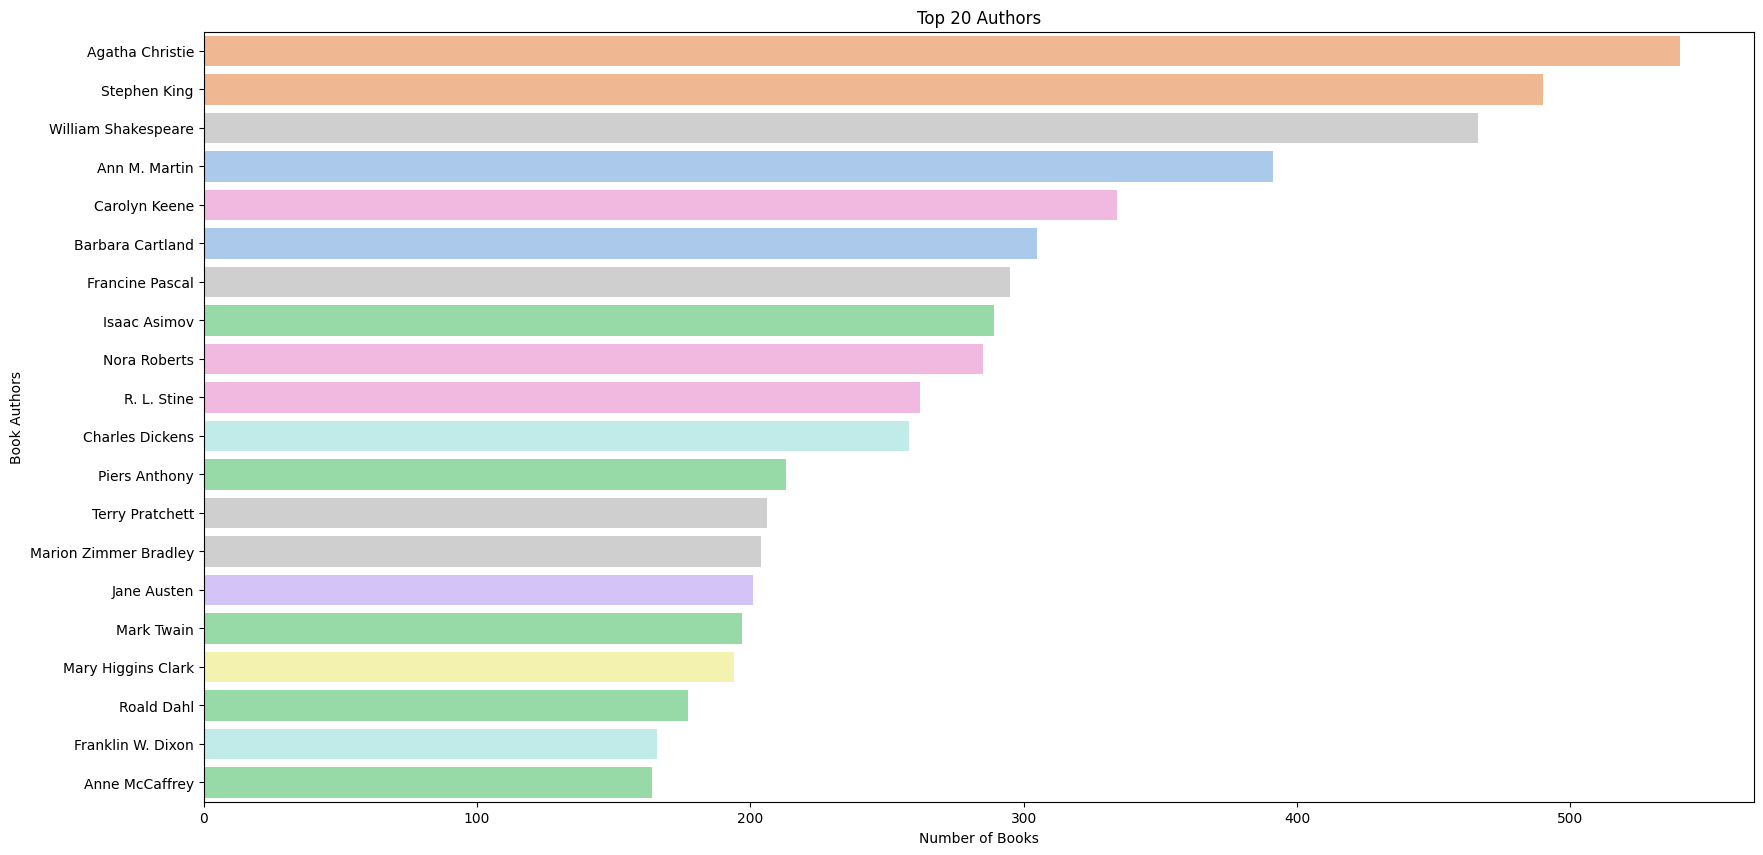

In [31]:
# Let's check the top 20 authors again
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_author', data=books, order=pd.Series(books['book_author']).value_counts().iloc[:20].index, hue='book_author', legend=False, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Book Authors')
plt.title('Top 20 Authors')

In [51]:
books[books['isbn'] == '738702943'] # Example ISBN with missing author information

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
5530,738702943,Llewellyn's 2003 Wicca Almanac: Spring 2003 to...,No author found,2003-01-01,Llewellyn Publications,http://images.amazon.com/images/P/0738702943.0...,http://images.amazon.com/images/P/0738702943.0...,http://images.amazon.com/images/P/0738702943.0...,Witchcraft


In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226493 entries, 0 to 226492
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   isbn                 226493 non-null  object        
 1   book_title           226493 non-null  object        
 2   book_author          226493 non-null  object        
 3   year_of_publication  226493 non-null  datetime64[ns]
 4   publisher            226493 non-null  object        
 5   image_url_s          226493 non-null  object        
 6   image_url_m          226493 non-null  object        
 7   image_url_l          226493 non-null  object        
 8   genre                226493 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.6+ MB


In [52]:
# Now let's update the .csv file with the new data
# books.to_csv('df_clean.csv', sep=';', index=False, encoding='utf-8')

##### Rows with displaced authors and years:
Below you can see the rows with displaced author information.

The issue has been fixed within the .csv file so that it's gone when importing the updated .csv.

In [158]:
# 789466953
books.loc[books.isbn == '789466953']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
222437,789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000-01-01,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,"X-men (Comic strip), X-Men (Fictitious charact..."


In [170]:
# 078946697X
books.loc[books.isbn == '078946697X']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
222433,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000-01-01,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,"History and criticism, Cartoons and comics, X-..."


In [40]:
books.loc[books.isbn == '2070426769']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
221462,2070426769,"Peuple du ciel, suivi de 'Les Bergers'",Jean-Marie Gustave Le Clezio,2003-01-01,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,French Short stories


Below you can see how the issue was handled initially (before the .csv was corrected)

In [114]:
# #From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
# #ISBN '0789466953'

# img_s = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZZZZZ'
# img_m = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ'
# img_l = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ'

# books.loc[books.isbn == '2070426769', 'year_of_publication'] = '2003-01-01'
# books.loc[books.isbn == '2070426769', 'book_author'] = "Jean Marie Gustave Le Clezio"
# books.loc[books.isbn == '2070426769', 'publisher'] = "Gallimard"
# books.loc[books.isbn == '2070426769', 'book_title'] = "Peuple du ciel, suivi de Les Bergers"
# books.loc[books.isbn == '2070426769', 'image_url_s'] = img_s
# books.loc[books.isbn == '2070426769', 'image_url_m'] = img_m
# books.loc[books.isbn == '2070426769', 'image_url_l'] = img_l

# books.loc[books.isbn == '2070426769']
# #corrections done

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
221463,2070426769,"Peuple du ciel, suivi de Les Bergers",Jean Marie Gustave Le Clezio,2003-01-01,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,French Short stories


In [785]:
# #From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
# #ISBN '0789466953'
# books.loc[books.isbn == '0789466953','year_of_publication'] = 2000
# books.loc[books.isbn == '0789466953','book_author'] = "James Buckley"
# books.loc[books.isbn == '0789466953','publisher'] = "DK Publishing Inc"
# books.loc[books.isbn == '0789466953','book_title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# #ISBN '078946697X'
# books.loc[books.isbn == '078946697X','year_of_publication'] = '2000-01-01'
# books.loc[books.isbn == '078946697X','book_author'] = "Michael Teitelbaum"
# books.loc[books.isbn == '078946697X','publisher'] = "DK Publishing Inc"
# books.loc[books.isbn == '078946697X','book_title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

# #rechecking
# books.loc[(books.isbn == '0789466953') | (books.isbn == '078946697X'),:]
# #corrections done

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,unknown
